MLPC Individual Assingnment

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler as SparkStandardScaler
from pyspark.ml.regression import LinearRegression as SparkLinearRegression
from pyspark.ml.regression import RandomForestRegressor as SparkRandomForestRegressor
from pyspark.ml import Pipeline as SparkPipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [3]:
spark = SparkSession.builder.appName("FloodPrediction")\
    .config("spark.driver.memory", "4g")\
    .config("spark.executor.memory", "4g")\
    .getOrCreate()

In [4]:
df = pd.read_csv('/content/drive/MyDrive/flood.csv')

In [5]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [6]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [7]:
df.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [9]:
df.dtypes

,0
MonsoonIntensity,int64
TopographyDrainage,int64
RiverManagement,int64
Deforestation,int64
Urbanization,int64
ClimateChange,int64
DamsQuality,int64
Siltation,int64
AgriculturalPractices,int64
Encroachments,int64


In [10]:
df.shape

(50000, 21)

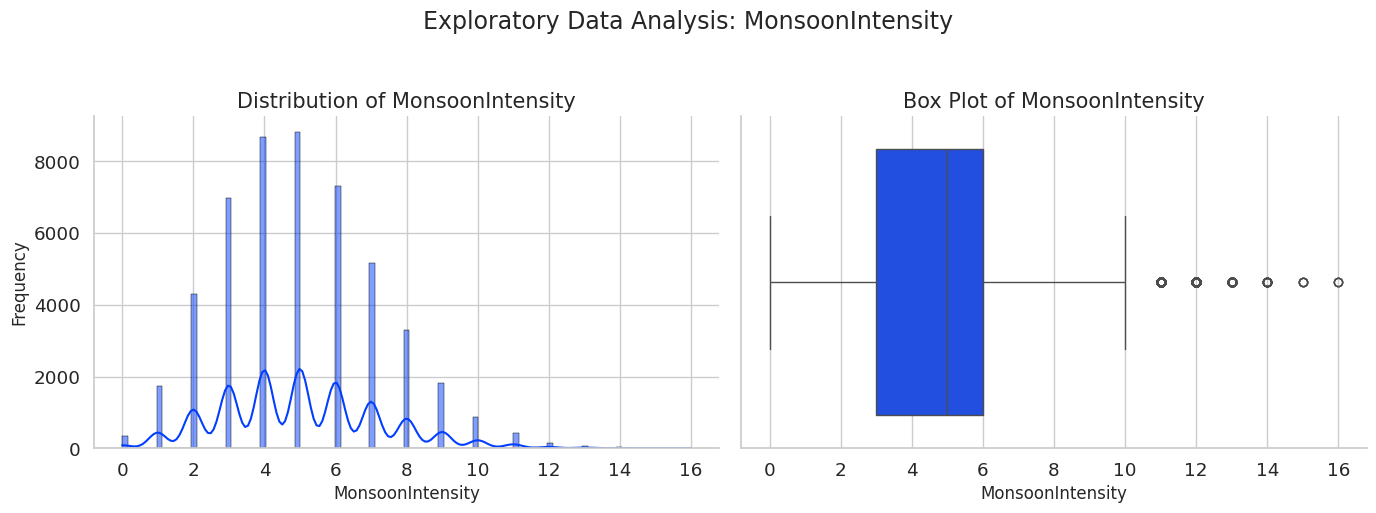

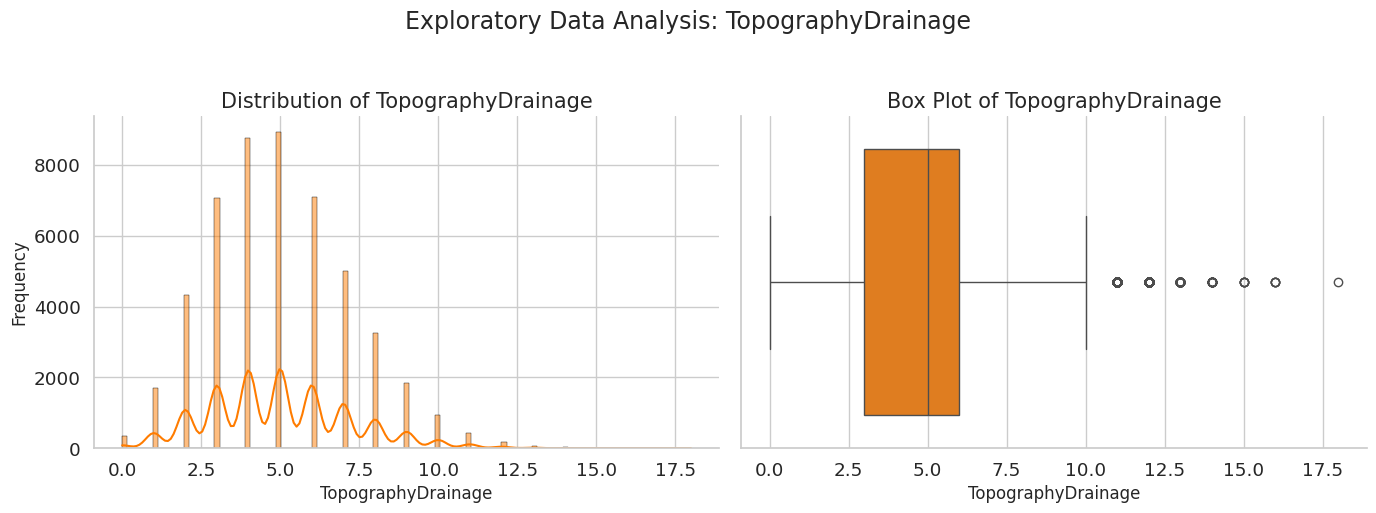

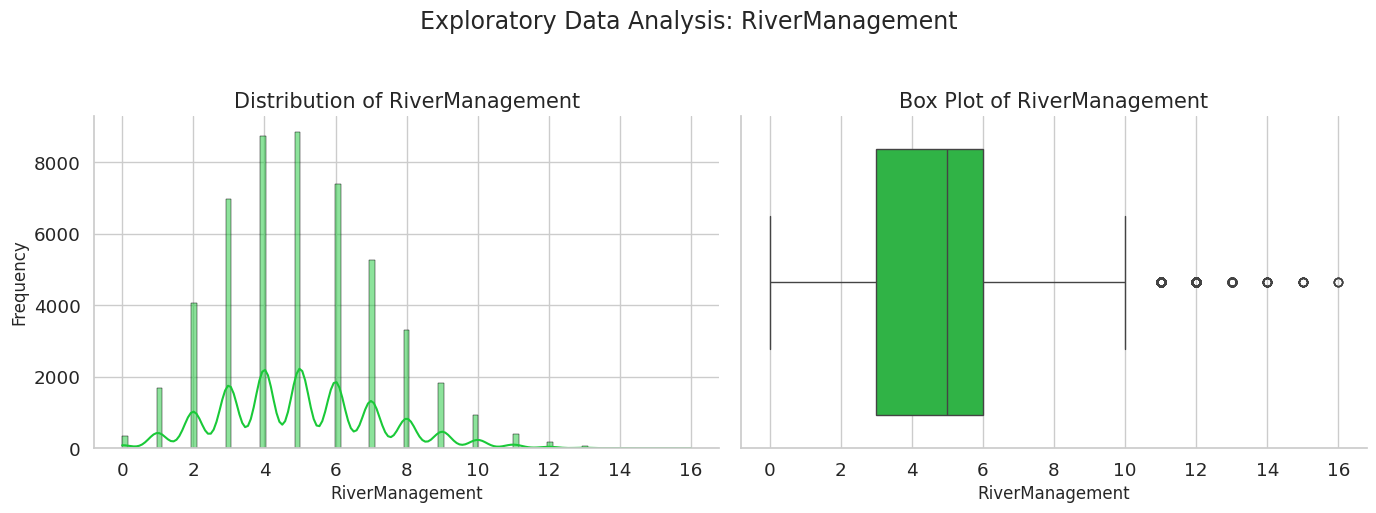

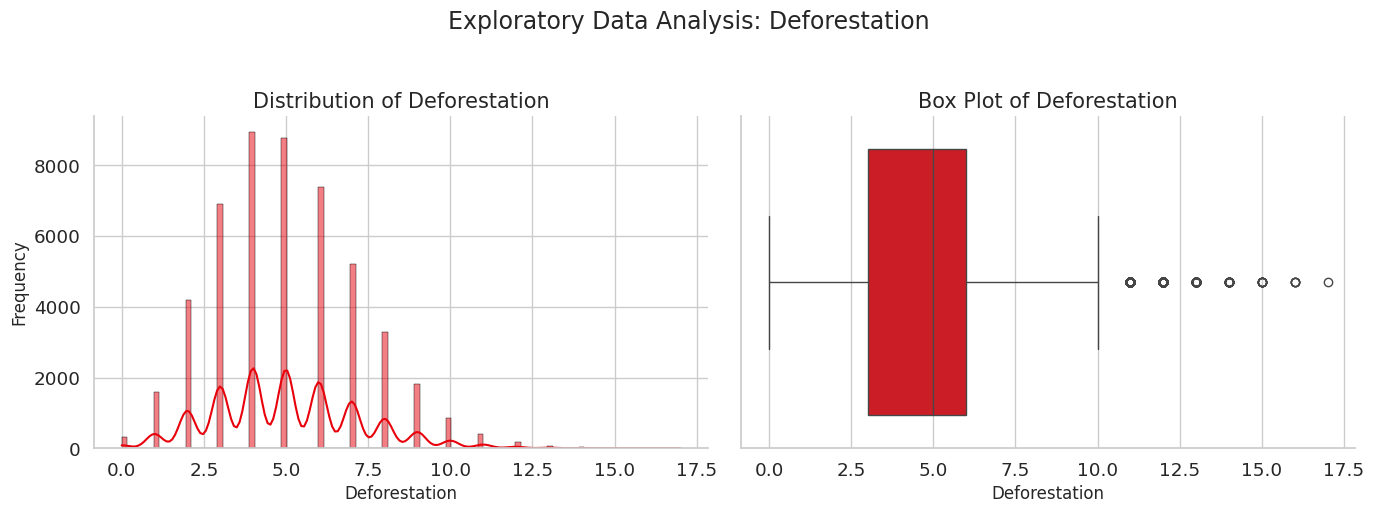

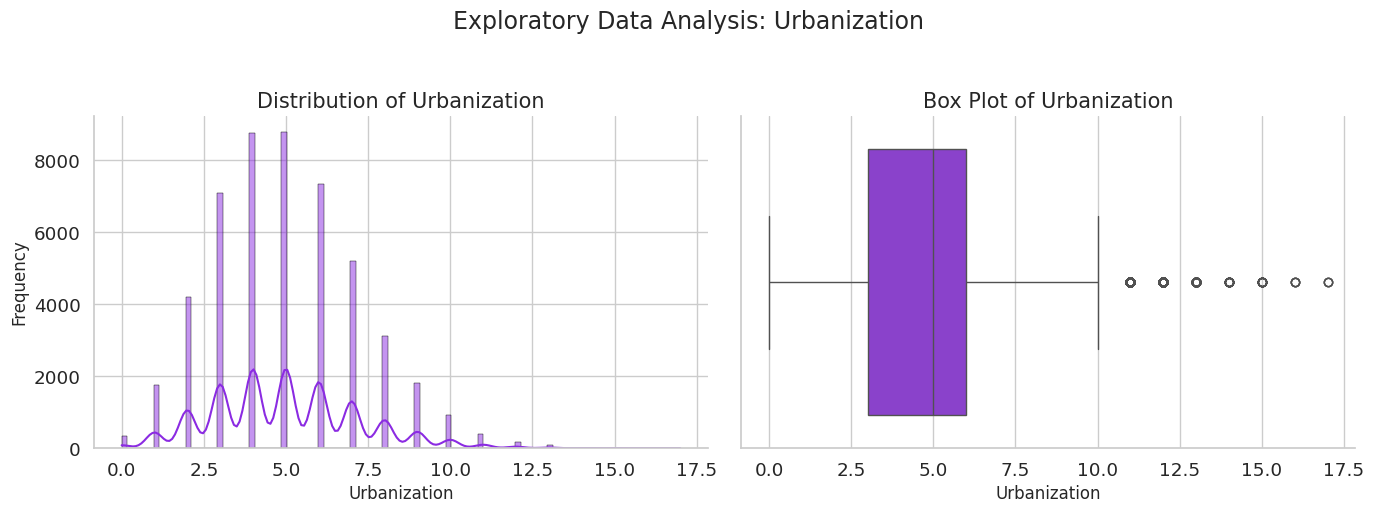

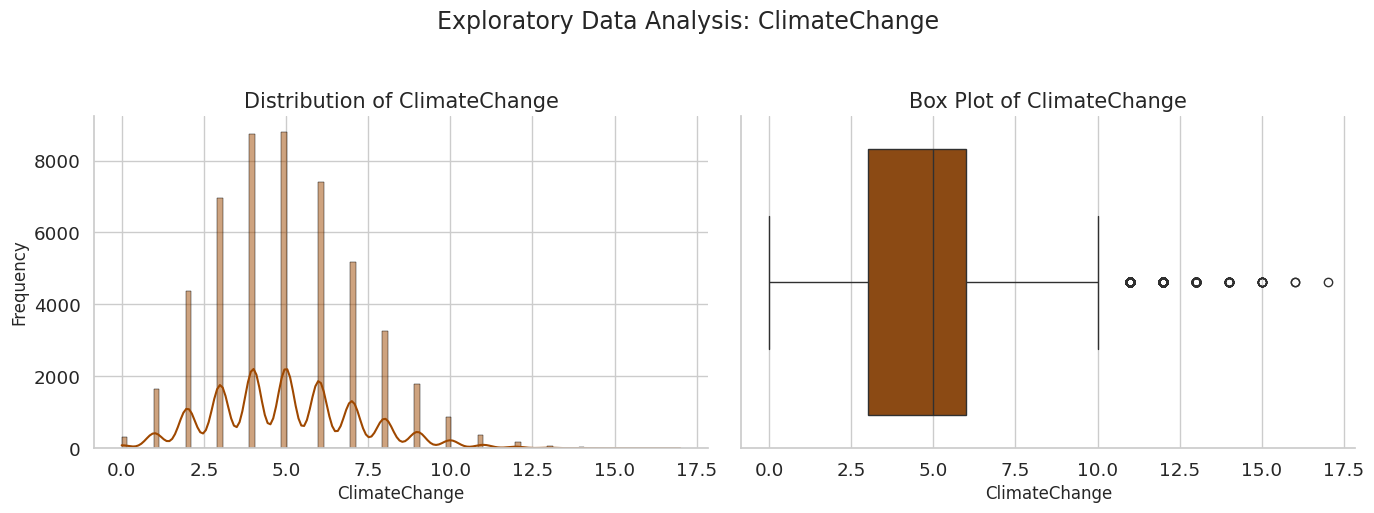

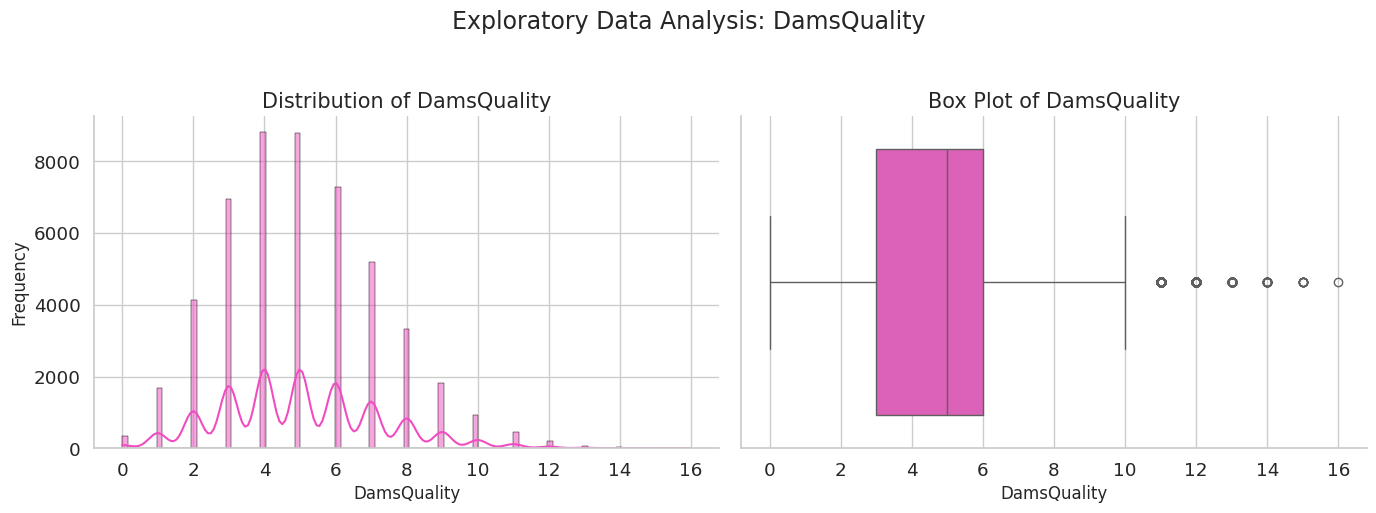

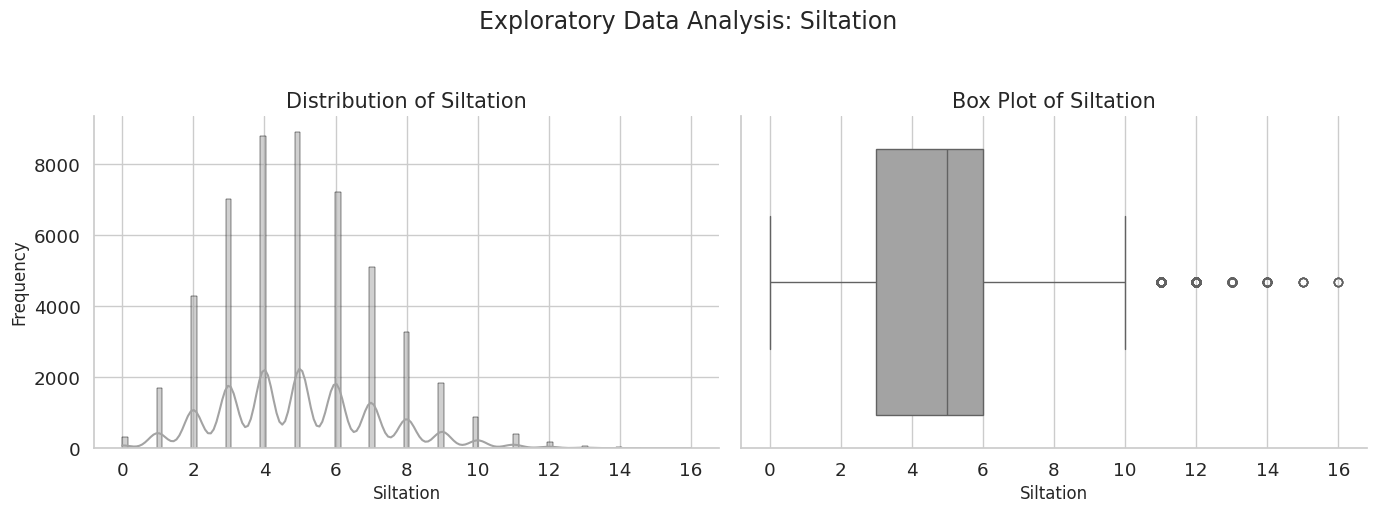

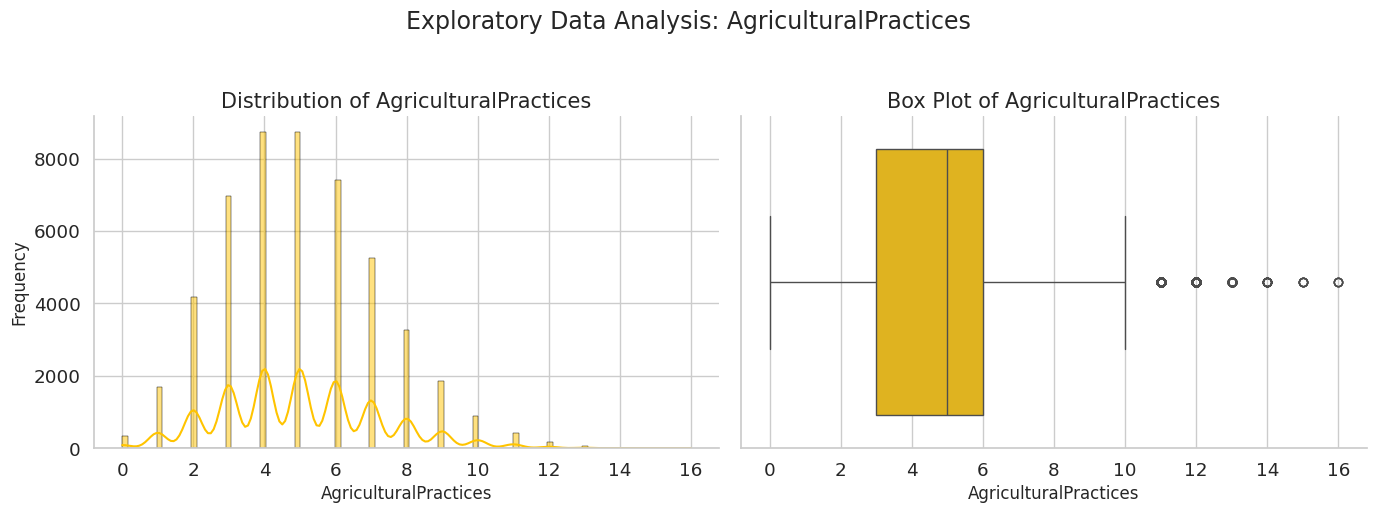

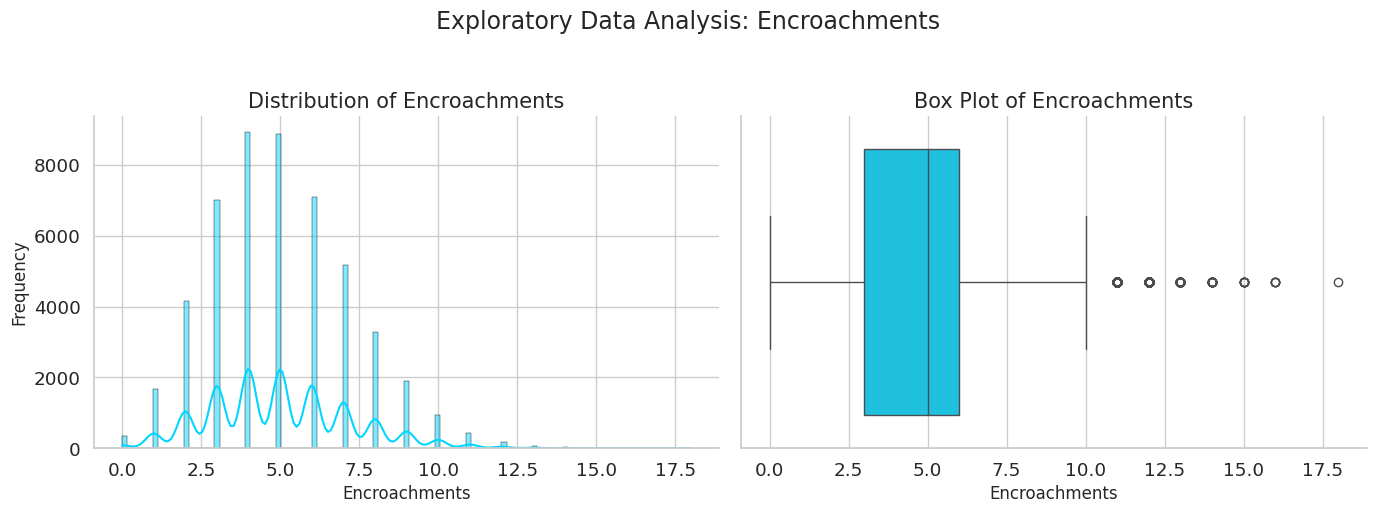

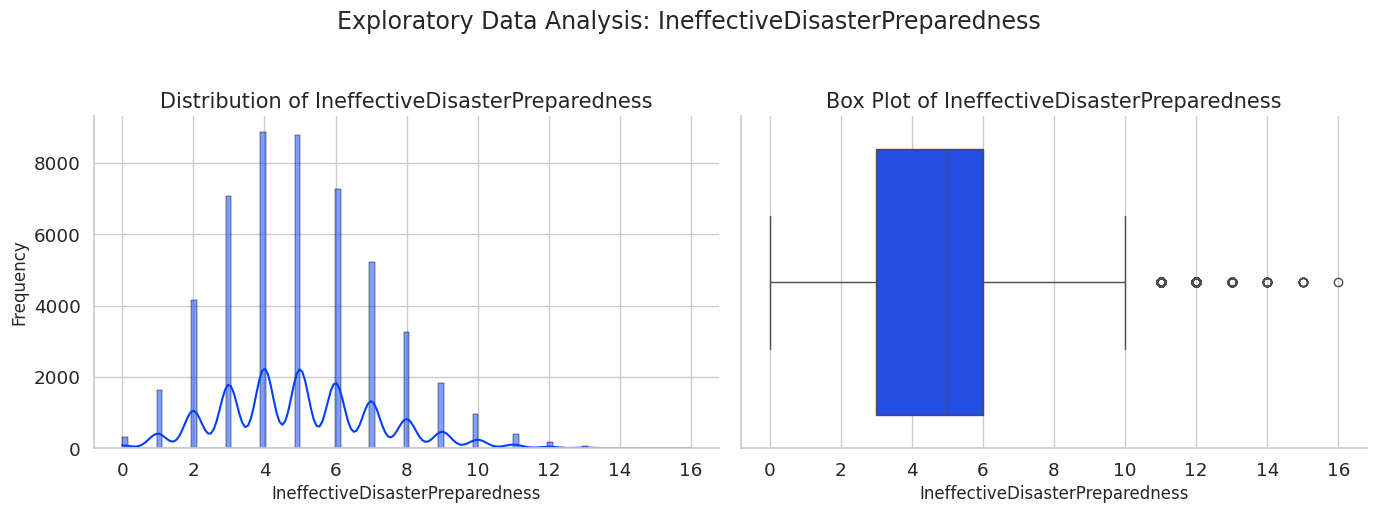

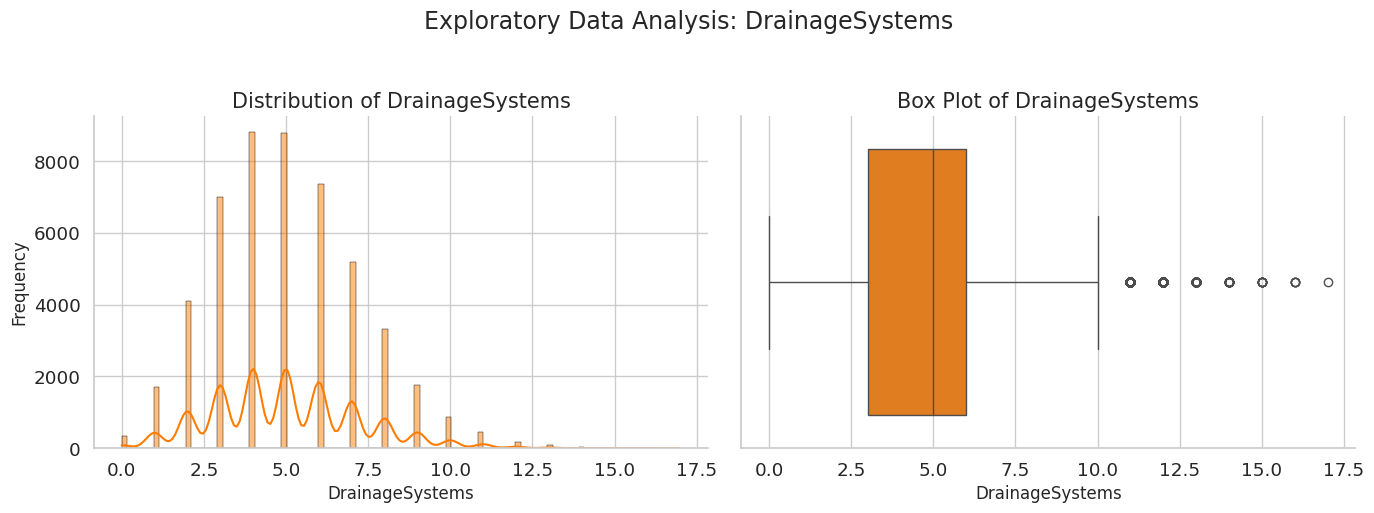

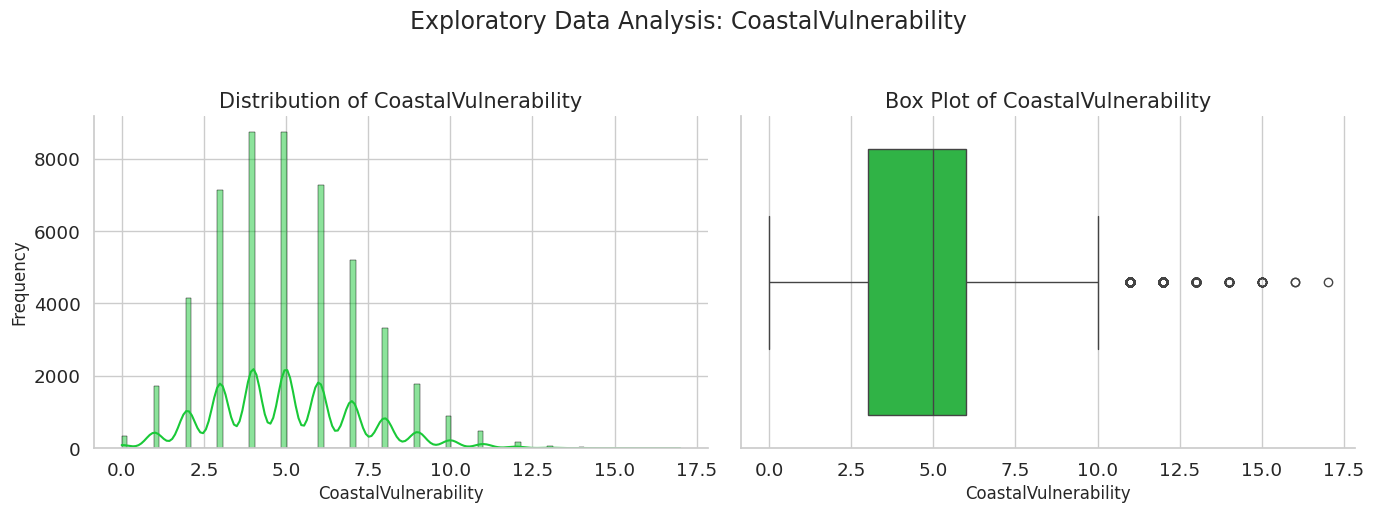

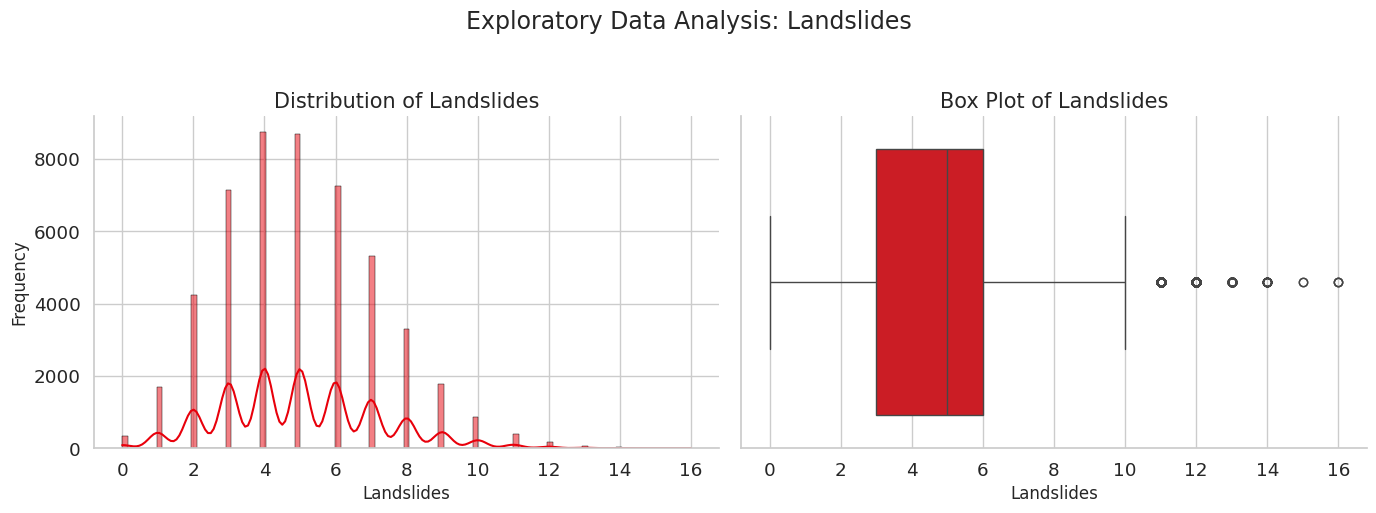

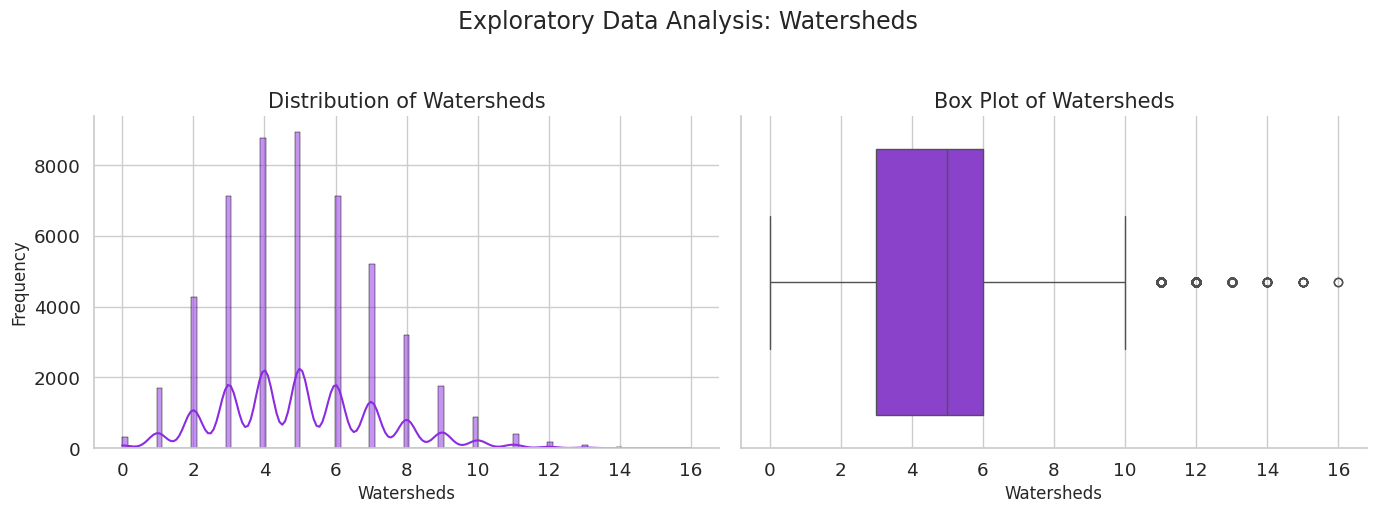

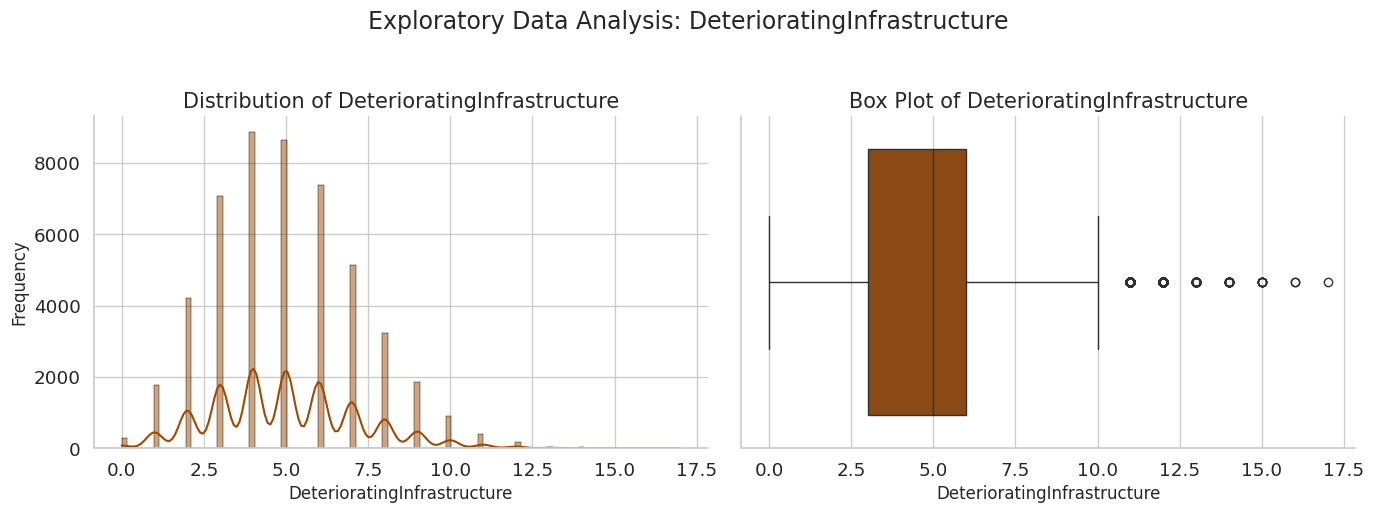

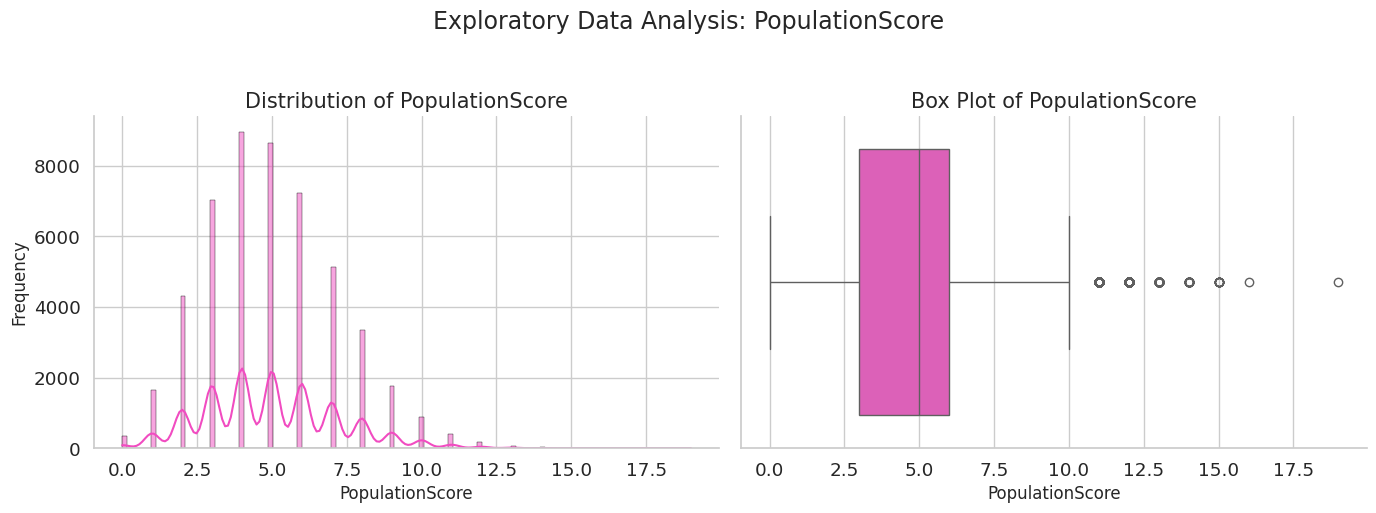

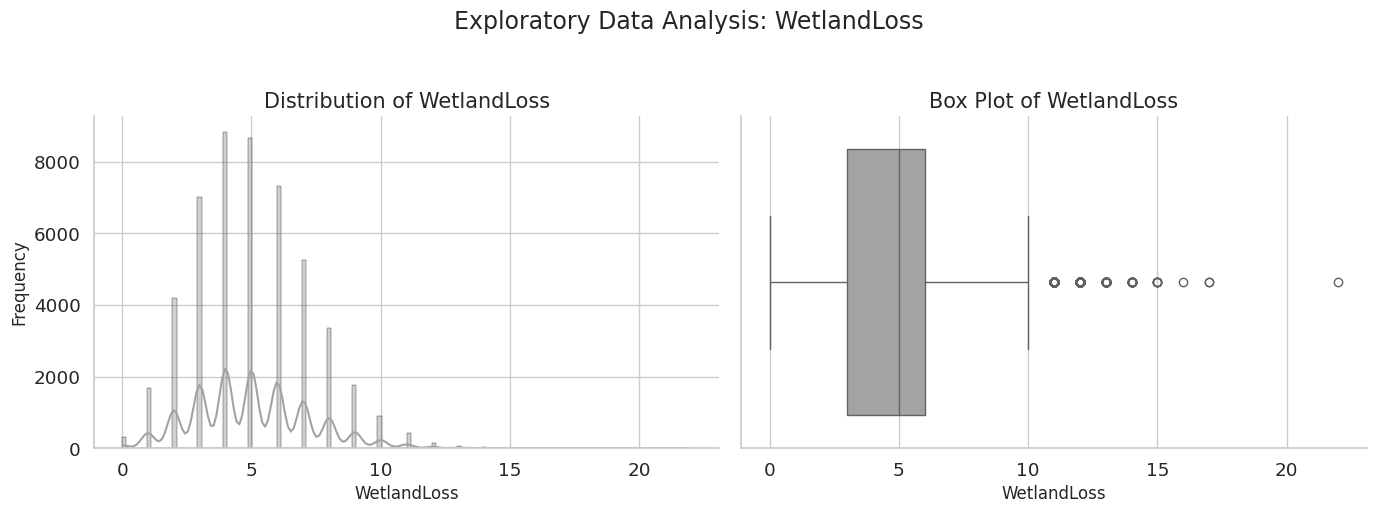

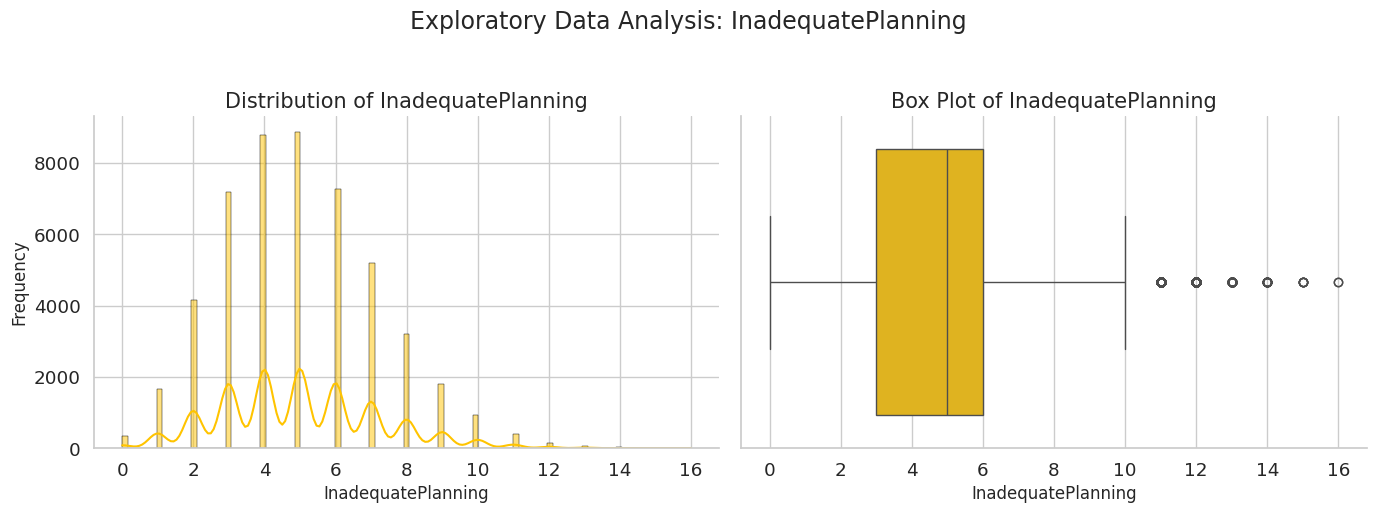

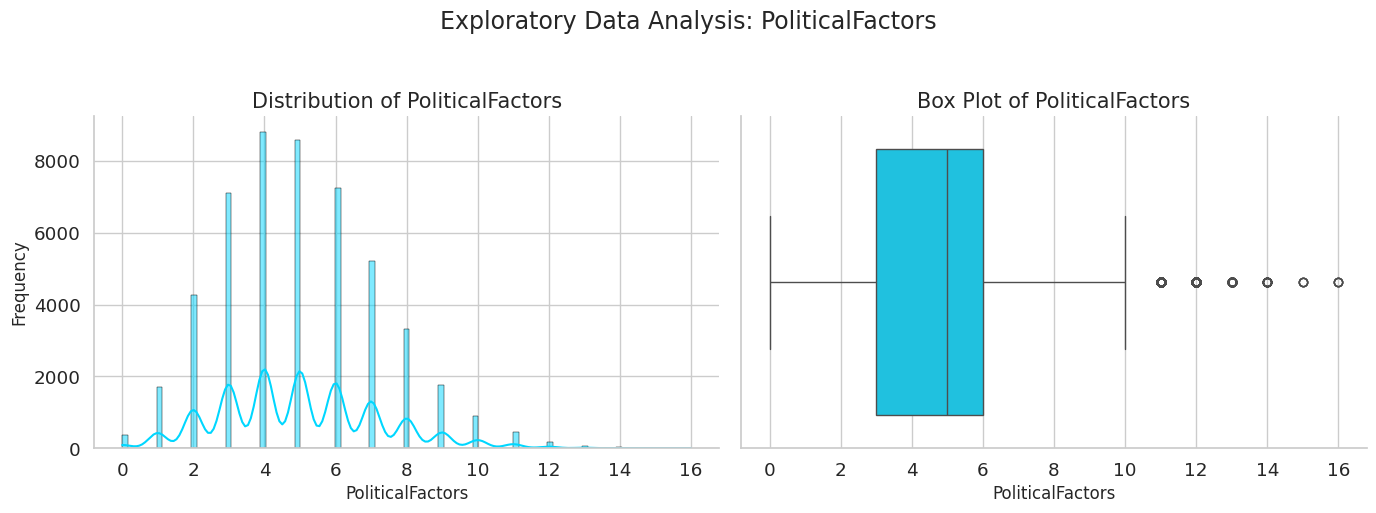

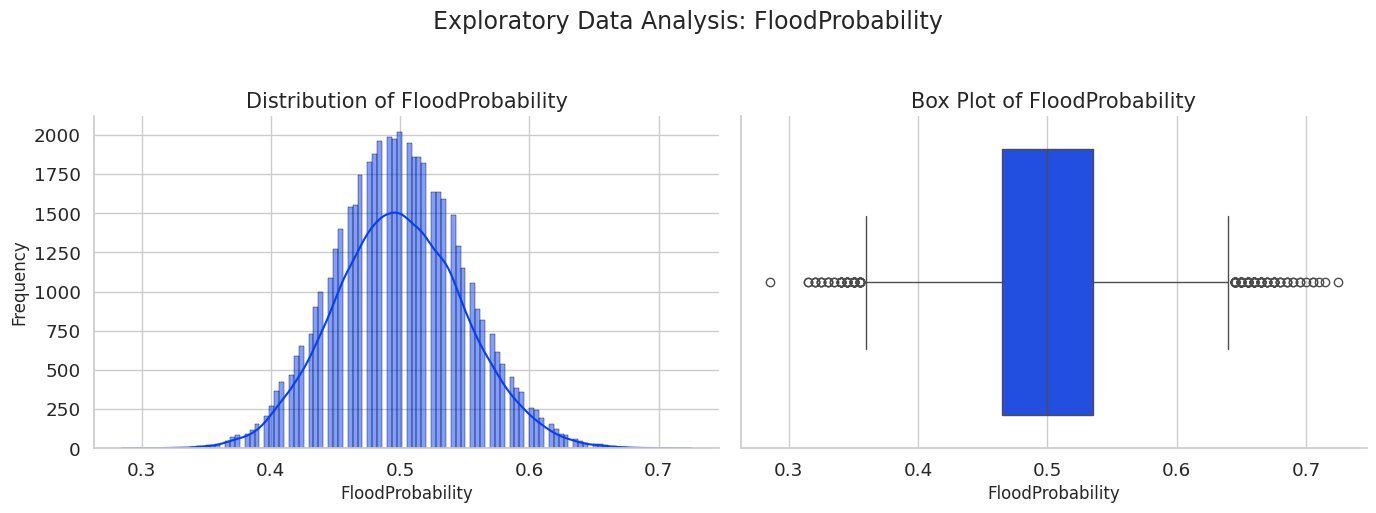

In [11]:
sns.set_theme(style="whitegrid", font_scale=1.2)

palette = sns.color_palette("bright", n_colors=len(df.select_dtypes(include='number').columns))

for idx, col in enumerate(df.select_dtypes(include='number').columns):
    color = palette[idx]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(data=df, x=col, kde=True, color=color, edgecolor='black', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=15)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    sns.boxplot(data=df, x=col, color=color, ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}', fontsize=15)
    axes[1].set_xlabel(col, fontsize=12)

    for ax in axes:
        sns.despine(ax=ax)

    plt.suptitle(f'Exploratory Data Analysis: {col}', fontsize=17, y=1.03)
    plt.tight_layout()
    plt.show()

In [12]:
spark_df = spark.createDataFrame(df)

In [13]:
features = df.columns.drop('FloodProbability').tolist()
target = 'FloodProbability'

In [14]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
train_df = spark.createDataFrame(pd.concat([X_train, y_train], axis=1))
test_df = spark.createDataFrame(pd.concat([X_test, y_test], axis=1))

In [20]:
def train_and_evaluate_non_parallel(X_train, X_test, y_train, y_test, model_type):
    if model_type == 'LinearRegression':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', LinearRegression())
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', RandomForestRegressor(
                n_estimators=50,
                max_depth=15,
                min_samples_split=2,
                min_samples_leaf=1,
                random_state=42,
                n_jobs=1
            ))
        ])

    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = pipeline.predict(X_test)
    pred_time = time.time() - start_time

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    feature_importance = None
    p_values = None

    if model_type == 'RandomForest':
        rf_model = pipeline.named_steps['model']
        feature_importance = dict(zip(X_train.columns, rf_model.feature_importances_))
    else:
        import statsmodels.api as sm
        X_train_sm = sm.add_constant(X_train)
        sm_model = sm.OLS(y_train, X_train_sm).fit()
        p_values = dict(zip(['Intercept'] + list(X_train.columns), sm_model.pvalues))

    return {
        'model_name': model_type,
        'execution_type': 'Non-Parallel',
        'train_time': train_time,
        'pred_time': pred_time,
        'mse': mse,
        'r2': r2,
        'feature_importance': feature_importance,
        'p_values': p_values,
        'pipeline': pipeline
    }


In [17]:
print("Non-Parallel Execution:")
non_parallel_results = []
non_parallel_results.append(train_and_evaluate_non_parallel(X_train, X_test, y_train, y_test, 'LinearRegression'))
non_parallel_results.append(train_and_evaluate_non_parallel(X_train, X_test, y_train, y_test, 'RandomForest'))

print("Non-Parallel Results:")
for result in non_parallel_results:
    print(f"{result['model_name']}: MSE={result['mse']:.4f}, R²={result['r2']:.4f}, "
          f"Train Time={result['train_time']:.4f}s, Pred Time={result['pred_time']:.4f}s")

Non-Parallel Execution:
Non-Parallel Results:
LinearRegression: MSE=0.0000, R²=1.0000, Train Time=0.0571s, Pred Time=0.0038s
RandomForest: MSE=0.0007, R²=0.7040, Train Time=16.8709s, Pred Time=0.1615s


In [22]:
def train_and_evaluate_parallel(spark_train_df, spark_test_df, model_type):
    assembler = VectorAssembler(inputCols=features, outputCol="raw_features")
    scaler = SparkStandardScaler(inputCol="raw_features", outputCol="features", withStd=True, withMean=True)

    if model_type == 'LinearRegression':
        model = SparkLinearRegression(labelCol=target, featuresCol="features", fitIntercept=True)
    else:
        model = SparkRandomForestRegressor(
            labelCol=target,
            featuresCol="features",
            numTrees=50,
            maxDepth=15,
            minInstancesPerNode=1,
            seed=42
        )

    pipeline = SparkPipeline(stages=[assembler, scaler, model])

    start_time = time.time()
    fitted_pipeline = pipeline.fit(spark_train_df)
    train_time = time.time() - start_time

    start_time = time.time()
    predictions = fitted_pipeline.transform(spark_test_df)
    pred_time = time.time() - start_time

    evaluator = RegressionEvaluator(labelCol=target, predictionCol="prediction")
    mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})

    p_values = None
    feature_importance = None

    if model_type == 'LinearRegression':
        lr_model = fitted_pipeline.stages[-1]
        p_values = dict(zip(['Intercept'] + features, lr_model.summary.pValues))
    else:
        rf_model = fitted_pipeline.stages[-1]
        feature_importance = dict(zip(features, rf_model.featureImportances.toArray()))

    return {
        'model_name': model_type,
        'execution_type': 'Parallel',
        'train_time': train_time,
        'pred_time': pred_time,
        'mse': mse,
        'r2': r2,
        'feature_importance': feature_importance,
        'p_values': p_values,
        'pipeline': fitted_pipeline
    }


In [23]:
print("\nParallel Execution (PySpark):")
parallel_results = []

# Linear Regression
print("Running LinearRegression (Parallel)...")
start_lr = time.time()
parallel_results.append(train_and_evaluate_parallel(train_df, test_df, 'LinearRegression'))
print(f"LinearRegression completed in {time.time() - start_lr:.4f}s")

# Random Forest
print("Running RandomForest (Parallel)...")
start_rf = time.time()
parallel_results.append(train_and_evaluate_parallel(train_df, test_df, 'RandomForest'))
print(f"RandomForest completed in {time.time() - start_rf:.4f}s")

print("Parallel Results:")
for result in parallel_results:
    print(f"{result['model_name']}: MSE={result['mse']:.4f}, R²={result['r2']:.4f}, "
          f"Train Time={result['train_time']:.4f}s, Pred Time={result['pred_time']:.4f}s")


Parallel Execution (PySpark):
Running LinearRegression (Parallel)...
LinearRegression completed in 4.9451s
Running RandomForest (Parallel)...
RandomForest completed in 193.5545s
Parallel Results:
LinearRegression: MSE=0.0000, R²=1.0000, Train Time=3.5086s, Pred Time=0.1672s
RandomForest: MSE=0.0008, R²=0.6933, Train Time=180.1241s, Pred Time=10.1535s



Non-Parallel Linear Regression Equation:
y = 0.4995 + 0.0112*MonsoonIntensity + 0.0112*TopographyDrainage + 0.0111*RiverManagement + 0.0111*Deforestation + 0.0112*Urbanization + 0.0111*ClimateChange + 0.0112*DamsQuality + 0.0112*Siltation + 0.0112*AgriculturalPractices + 0.0112*Encroachments + 0.0111*IneffectiveDisasterPreparedness + 0.0112*DrainageSystems + 0.0112*CoastalVulnerability + 0.0111*Landslides + 0.0112*Watersheds + 0.0111*DeterioratingInfrastructure + 0.0112*PopulationScore + 0.0111*WetlandLoss + 0.0112*InadequatePlanning + 0.0112*PoliticalFactors

Parallel Linear Regression Equation:
y = 0.4995 + 0.0112*MonsoonIntensity + 0.0112*TopographyDrainage + 0.0111*RiverManagement + 0.0111*Deforestation + 0.0112*Urbanization + 0.0111*ClimateChange + 0.0112*DamsQuality + 0.0112*Siltation + 0.0112*AgriculturalPractices + 0.0112*Encroachments + 0.0111*IneffectiveDisasterPreparedness + 0.0112*DrainageSystems + 0.0112*CoastalVulnerability + 0.0111*Landslides + 0.0112*Watersheds + 0.011

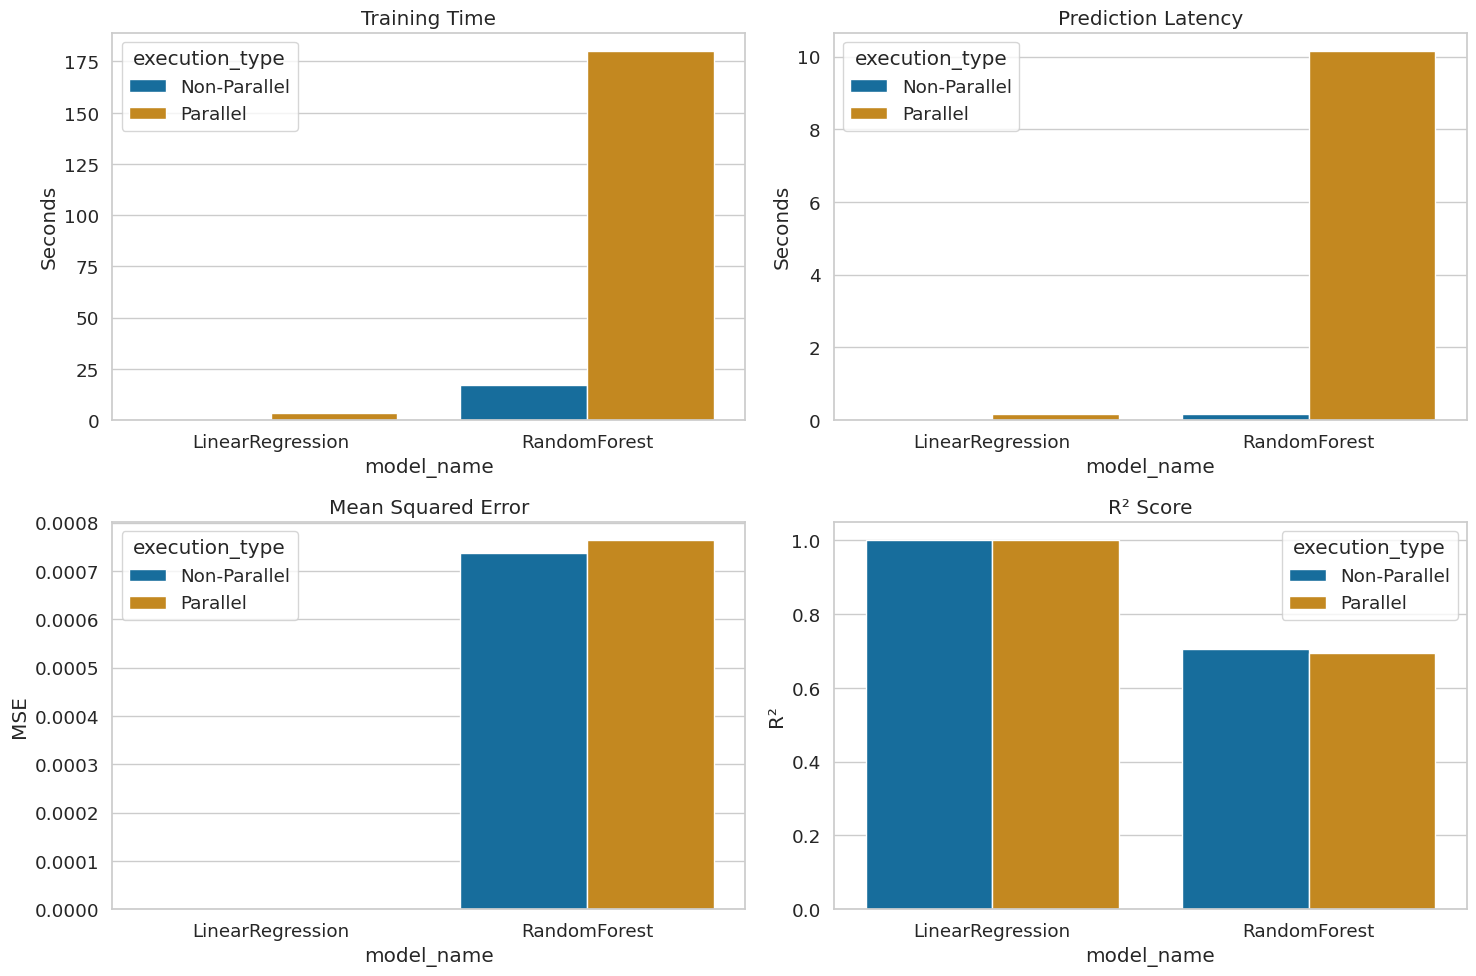


Comparison of Results:
      model_name execution_type  train_time  pred_time          mse       r2
LinearRegression   Non-Parallel    0.057081   0.003793 1.152384e-32 1.000000
    RandomForest   Non-Parallel   16.870908   0.161523 7.371764e-04 0.704015
LinearRegression       Parallel    3.508646   0.167150 1.927099e-29 1.000000
    RandomForest       Parallel  180.124112  10.153543 7.637863e-04 0.693331

Non-Parallel Total Training Time: 16.9280 s
Parallel Total Training Time: 183.6328 s


In [24]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

results_df = pd.DataFrame(non_parallel_results + parallel_results)

lr_non_parallel = [res for res in non_parallel_results if res['model_name'] == 'LinearRegression'][0]
lr_parallel = [res for res in parallel_results if res['model_name'] == 'LinearRegression'][0]

lr_model_non_parallel = lr_non_parallel['pipeline'].named_steps['model']
coefs_non_parallel = lr_model_non_parallel.coef_
intercept_non_parallel = lr_model_non_parallel.intercept_
equation_non_parallel = f"y = {intercept_non_parallel:.4f}"
for coef, feature in zip(coefs_non_parallel, features):
    equation_non_parallel += f" + {coef:.4f}*{feature}"
print("\nNon-Parallel Linear Regression Equation:")
print(equation_non_parallel)

lr_model_parallel = lr_parallel['pipeline'].stages[-1]
coefs_parallel = lr_model_parallel.coefficients.toArray()
intercept_parallel = lr_model_parallel.intercept
equation_parallel = f"y = {intercept_parallel:.4f}"
for coef, feature in zip(coefs_parallel, features):
    equation_parallel += f" + {coef:.4f}*{feature}"
print("\nParallel Linear Regression Equation:")
print(equation_parallel)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x='model_name', y='train_time', hue='execution_type')
plt.title('Training Time')
plt.ylabel('Seconds')

plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x='model_name', y='pred_time', hue='execution_type')
plt.title('Prediction Latency')
plt.ylabel('Seconds')

plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x='model_name', y='mse', hue='execution_type')
plt.title('Mean Squared Error')
plt.ylabel('MSE')

plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x='model_name', y='r2', hue='execution_type')
plt.title('R² Score')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

print("\nComparison of Results:")
print(results_df[['model_name', 'execution_type', 'train_time', 'pred_time', 'mse', 'r2']].to_string(index=False))

non_parallel_total_time = sum(res['train_time'] for res in non_parallel_results)
parallel_total_time = sum(res['train_time'] for res in parallel_results)
print(f"\nNon-Parallel Total Training Time: {non_parallel_total_time:.4f} s")
print(f"Parallel Total Training Time: {parallel_total_time:.4f} s")


In [25]:
rf_result = [res for res in non_parallel_results if res['model_name'] == 'RandomForest'][0]
feature_importance = rf_result['feature_importance']
top_feature = max(feature_importance, key=feature_importance.get)

sample_size = max(1, int(0.01 * len(X_test)))
sample_idx = np.random.choice(X_test.index, size=sample_size, replace=False)

X_test_1pct = X_test.loc[sample_idx]
y_test_1pct = y_test.loc[sample_idx]

y_pred_np_lr = lr_non_parallel['pipeline'].predict(X_test_1pct)
y_pred_p_lr = lr_parallel['pipeline'].transform(
                  spark.createDataFrame(X_test_1pct)
              ).select("prediction").toPandas().squeeze()

x_range = np.linspace(X_test[top_feature].min(),
                      X_test[top_feature].max(), 100)

coef_np = lr_model_non_parallel.coef_[features.index(top_feature)]
intr_np = lr_model_non_parallel.intercept_

coef_p = lr_model_parallel.coefficients.toArray()[features.index(top_feature)]
intr_p = lr_model_parallel.intercept


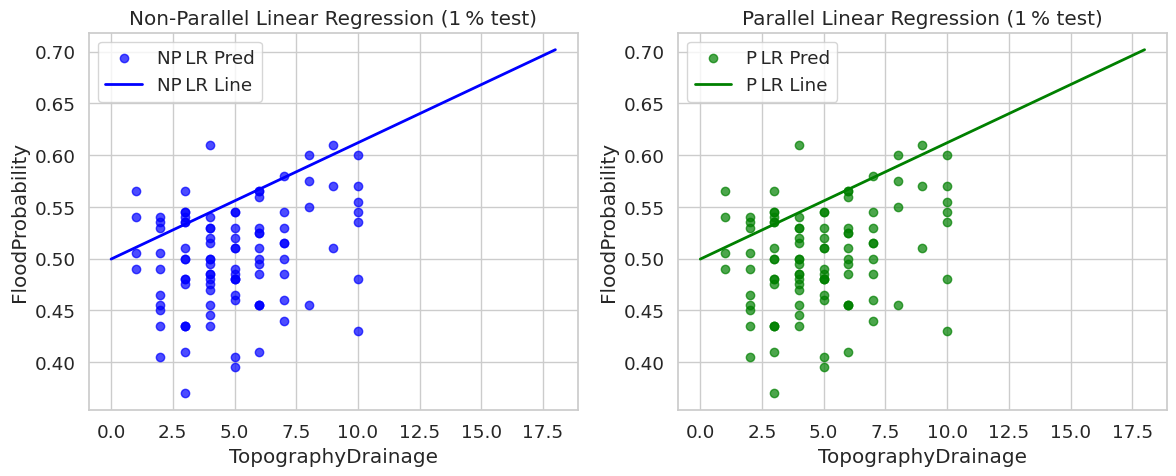

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test_1pct[top_feature], y_pred_np_lr,
            color='blue', label='NP LR Pred', alpha=0.7)

plt.plot(x_range, coef_np * x_range + intr_np,
         color='blue', linewidth=2, label='NP LR Line')

plt.title("Non‑Parallel Linear Regression (1 % test)")
plt.xlabel(top_feature)
plt.ylabel('FloodProbability')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test_1pct[top_feature], y_pred_p_lr,
            color='green', label='P LR Pred', alpha=0.7)

plt.plot(x_range, coef_p * x_range + intr_p,
         color='green', linewidth=2, label='P LR Line')

plt.title("Parallel Linear Regression (1 % test)")
plt.xlabel(top_feature)
plt.ylabel('FloodProbability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:
spark.stop()